In [1]:
import json
import bz2
import regex
from tqdm import tqdm
from scipy import sparse
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.manifold import TSNE

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\79169\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
stop_words = set(stopwords.words('russian'))

In [3]:
responses = []
with bz2.BZ2File(r'C:\Users\79169\Desktop\домашка\banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:32, 6198.90it/s]


In [4]:
df = pd.DataFrame(responses)

In [5]:
df

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Москва,False,Жалоба,0,лицензия № 2562,uhnov1,Бинбанк,2015-06-08 12:50:54,Добрый день! Я не являюсь клиентом банка и пор...,NaN
1,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,лицензия № 1481,Foryou,Сбербанк России,2015-06-08 11:09:57,Доброго дня! Являюсь держателем зарплатной кар...,NaN
2,г. Москва,False,Двойное списание за один товар.,1,лицензия № 2562,Vladimir84,Бинбанк,2015-06-05 20:14:28,Здравствуйте! Дублирую свое заявление от 03.0...,NaN
3,г. Ставрополь,False,Меняют проценты комиссии не предупредив и не ...,2,лицензия № 1481,643609,Сбербанк России,2015-06-05 13:51:01,Добрый день!! Я открыл расчетный счет в СберБа...,NaN
4,г. Челябинск,False,Верните денежные средства за страховку,1,лицензия № 2766,anfisa-2003,ОТП Банк,2015-06-05 10:58:12,"04.03.2015 г. взяла кредит в вашем банке, заяв...",NaN
...,...,...,...,...,...,...,...,...,...,...
153494,None,False,Не все так страшно,0,лицензия № 2557,Вера,Ситибанк,2005-05-18 14:38:00,"Слишком большой банк, не всегда учитывает нашу...",5.0
153495,None,False,А вы договор читали?,0,лицензия № 2557,Kirill,Ситибанк,2005-04-14 15:25:00,"Вы сами виноваты в своих проблемах, кроме пред...",3.0
153496,None,False,"Филиал банка ""ОВК"" в г. Иваново",1,лицензия № 2272,AlexU-post,Росбанк,2005-04-08 14:07:00,Уважаемое руководство банка «ОВК»! Я проживаю ...,1.0
153497,None,False,В Альфа-Банк больше обращаться не буду.,0,лицензия № 1326,Ирина,Альфа-Банк,2005-04-14 15:16:00,Пробовала 10.04.05 оформить товар в кредит в А...,1.0


In [6]:
good_df = df[df.rating_grade > 4.0].sample(n=5000)
good_df

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
128927,г. Москва,False,Успешное опротестование операции несанкциониро...,14,лицензия № 2879,LeoFisher,Авангард,2010-12-10 14:48:00,Пользуюсь услугами данного банка уже около 3 с...,5.0
125515,г. Нижний Новгород,False,"Спасибо, за отличную работу",1,лицензия № 3138,irina_vlad,Банк Жилищного Финансирования,2011-03-30 19:02:00,Добрый день! Хочу выразить благодарность сотру...,5.0
153058,None,False,ОФБУ и другие услуги,0,лицензия № 2771,Михаилу,Юниаструм Банк,2005-06-10 14:25:00,"Подозреваю, что 32% убытка Вы потерпели при ин...",5.0
106219,г. Балашиха,False,Качественное и оперативное обслуживание клиент...,0,лицензия № 1751,OLK-75,Московский Областной Банк,2012-06-20 11:43:00,"Мы юридическое лицо, которое обслуживается в Д...",5.0
73356,г. Москва,False,Кредит через сайт - очень удобно,3,лицензия № 1776,MimoShell,Петрокоммерц,2013-09-19 17:19:00,Хочу поблагодарить Петрокоммерц за возможность...,5.0
...,...,...,...,...,...,...,...,...,...,...
38407,г. Красноярск,False,Получение кредита и общая оценка обслуживания!,0,лицензия № 3251,Whill,Промсвязьбанк,2014-08-07 09:49:00,Что могу сказать - я в восторге! Наконец-то ...,5.0
25294,г. Москва,False,Надежный банк,0,лицензия № 2557,Mkssmirnova,Ситибанк,2014-11-28 15:07:00,Клиентом Ситибанка стала в рамка зарплатного п...,5.0
15267,г. Нижний Новгород,False,Долговременное сотрудничество,1,лицензия № 1326,vshakutin,Альфа-Банк,2015-01-31 14:34:00,Являюсь клиентом Альфа-банка уже 10 лет. За эт...,5.0
152801,None,False,Все путем!,0,лицензия № 2960,alexander,Славянский Кредит,2005-07-18 18:31:00,Сегодня положил деньги на депозит этого банка....,5.0


In [7]:
bad_df = df[df.rating_grade < 2.0].sample(n=5000)
bad_df

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
91064,г. Москва/Ростов,False,Технические и стратегические проблемы в банке ...,9,лицензия № 3279,kola22,Национальный Банк «Траст»,2013-02-12 15:23:00,Вот буквально полчаса назад вынул письмо из св...,1.0
135602,г. Москва,False,"""Премиальный"" сервис",1,лицензия № 3292,bankouser,Райффайзенбанк,2010-01-22 23:08:00,Райффайзен рассмешил в очередной раз. - Здрав...,1.0
71373,г. Южно-Сахалинск,False,Нежелание Сбербанка возвращать деньги,0,лицензия № 1481,AnastasyaKuz,Сбербанк России,2013-10-09 07:34:00,5 сентября 2013 года пополнила свою банковскую...,1.0
146672,None,False,Жду уже месяц,2,лицензия № 1,manunya,ЮниКредит Банк,2007-07-31 10:47:00,"Как я поняла, мой случай не единичный! 05.07.0...",1.0
141510,None,False,Хотел стать клиентом...,2,лицензия № 2748,ZYB,Банк Москвы,2008-10-27 15:54:00,Хотел завести себе кредитную карту с нормальны...,1.0
...,...,...,...,...,...,...,...,...,...,...
122428,г. Санкт-Петербург,False,Не могу получить уведомление о закрытии кредита,4,лицензия № 3407,kmariya08,БНП Париба Банк,2011-06-24 16:27:00,Добрый день! Два месяца не могу получить уведо...,1.0
28664,г. Псков,False,Изменения договора в одностороннем порядке,1,лицензия № 650,ДАВ111,Лето Банк,2014-11-01 00:21:00,Господа! Почему в Ваших офисах нет стационарны...,1.0
71947,г. Хабаровск,False,"Банкомат деньги списал, но не выдал!",4,лицензия № 1481,tdevochka,Сбербанк России,2013-10-02 08:39:00,"Проблема в том, что 20 сентября я снимала день...",1.0
149292,None,False,SMS бизнес в Альфа Экспресс,13,лицензия № 1326,Victor_Shpil,Альфа-Банк,2006-11-09 12:06:00,"В 2003 году я решил положить деньги, отложенны...",1.0


In [10]:
good_list = list(good_df['text'])
good_list[:10]

['Пользуюсь услугами данного банка уже около 3 с лишним лет. Обслуживание в Банке на мой взгляд отличное, как говорится, жил и радовался. Собственно, я и не знал об этом портале, пока не столкнулся с нештатной ситуацией (гуглил на тему опротестования операций по кредитным картам и вышел в том числе на этот сайт).  В октябре (по-моему 13 октября) этого года с моей карточки начали снимать средства в банкомате Петербурга (при том, что я в этот момент с карточкой находился на работе в Москве). Стали приходить СМСки по факту снятия. Пока достал карточку, посмотреть телефон банка, пока набрал номер - успели наснимать на ~ 23 000р. Карточку по звонку заблокировали, но деньги-то снять уже успели... По телефону проконсультировали, что надо подъехать в любой офис и написать заявление на опротестование операции. К слову сказать, сначала я сунулся в центральный (а он, как оказалось по приезду, работает только с юр. лицами), поэтому добрался до Якиманки только спустя 2 часа после факта снятия денег

In [11]:
bad_list = list(bad_df['text'])
bad_list[:10]

['Вот буквально полчаса назад вынул письмо из своего почтового ящика. Письмо отправлено банком траст аж из Хабаровска, а это ни много ни мало 7000 километров до места назначения. И что же в этом письме, а в нем сообщение о технической ошибке, произошедшей в период сентябрь - октябрь 2012 года. Из-за этой ошибки с меня планово не был списан подоходный налог в размере 12 (двенадцати рублей 00 копеек!) рублей! И далее в письме описывается схема моих действий и отношений с налоговой по месту жительства из-за вот этих 12 рублей!  Исправляйте такие ошибки за свой счет и присылайте письма о том, что взяли на себя обязательство выплатить 12 рублей. Это же очевидное решение проблемы.',
 'Райффайзен рассмешил в очередной раз.  - Здравствуйте! Мы решили предложить вам бесплатное премиальное обслуживание. Это специальные премиальные тарифы и услуги по специальным премиальным ценам. Запишите телефон вашего персонального премиального менеджера.  - Я не могу сейчас записать телефон. Я в дороге. Отпра

In [12]:
import re

In [13]:
import re

def clean_text(text):
     cleaned_text = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ\s]', '', text)
     cleaned_text = ' '.join(cleaned_text.split()).lower()
     return cleaned_text





In [14]:
all_reviews = good_list + bad_list

In [15]:
word_list = ' '.join(all_reviews).split()


In [16]:
cleaned_text_list = [clean_text(text) for text in word_list]

In [17]:
stop_words = set(stopwords.words("russian"))

In [18]:
filtered_words = [word for word in cleaned_text_list if word not in stop_words]

In [19]:
len(filtered_words)

1607609

In [ ]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
def lemmatize_sentence(sentence):
    return [morph.parse(word)[0].normal_form for word in word_tokenize(sentence)]


In [ ]:
sentences = []
for review in tqdm(filtered_words):
    sentences.extend(sent_tokenize(review))

100%|██████████| 1584578/1584578 [00:15<00:00, 101648.17it/s]


In [ ]:
sentences

In [ ]:
import joblib

In [ ]:
sentences = joblib.Parallel(n_jobs=-1)(joblib.delayed(lemmatize_sentence)(sentence) for sentence in tqdm(sentences))

100%|██████████| 1556039/1556039 [4:32:41<00:00, 95.10it/s]   


In [ ]:
len(sentences)

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
model_text = Word2Vec(sentences, workers=16, min_count=5, window=25, vector_size=1000)

In [ ]:
words_in_vocab = list(model_text.wv.index_to_key)
print(words_in_vocab)

['банк', 'карта', 'это', 'день', 'деньга', 'мой', 'отделение', 'кредит', 'который', 'сотрудник', 'клиент', 'счёт', 'сказать', 'год', 'свой', 'очень', 'вопрос', 'время', 'сумма', 'вклад', 'заявление', 'офис', 'получить', 'такой', 'мочь', 'кредитный', 'работа', 'платёж', 'работать', 'проблема', 'документ', 'позвонить', 'ответ', 'телефон', 'договор', 'банкомат', 'обслуживание', 'решить', 'дать', 'месяц', 'звонить', '2', 'хотеть', 'написать', 'минута', 'другой', 'прийти', 'очередь', 'один', 'сбербанк', 'человек', 'ваш', 'ситуация', 'сделать', 'просто', 'говорить', 'номер', 'рубль', 'тот', 'средство', 'срок', 'быть', 'услуга', 'заявка', 'весь', 'новый', 'знать', 'первый', 'звонок', 'информация', '3', 'девушка', 'процент', '1', 'какой', 'сайт', 'обратиться', 'операция', 'должный', 'спасибо', 'оформить', 'несколько', 'сам', 'ждать', 'неделя', 'г', 'никакой', 'сегодня', 'час', 'данный', 'пользоваться', 'условие', '5', 'открыть', 'отзыв', 'сразу', 'нужно', 'стать', 'перевод', 'претензия', 'я', 

In [ ]:
model_text.wv.most_similar('сотрудник')

[('результативный', 0.12521980702877045),
 ('реализовать', 0.12486681342124939),
 ('майя', 0.12137731909751892),
 ('иваново', 0.10929157584905624),
 ('тысруб', 0.1058616042137146),
 ('елееле', 0.10389465093612671),
 ('оценочный', 0.10378649830818176),
 ('ранний', 0.10176059603691101),
 ('костюм', 0.1008458063006401),
 ('чип', 0.0999833419919014)]

In [ ]:
analogy = model_text.wv.most_similar(positive=['банк', 'отделение'], negative=['консультировать'], topn=1)
print("Аналогия 'банк' - 'консультировать' :: 'отделение' - ?", analogy)

Аналогия 'банк' - 'консультировать' :: 'отделение' - ? [('свидетельство', 0.1217280775308609)]


In [ ]:
odd_one_out = model_text.wv.doesnt_match(["диван", "сумма", "деньги", "кредит"])
print("Лишнее слово из списка: ", odd_one_out)

Лишнее слово из списка:  диван


Постройте несколько визуализаций:
- TSNE для топ-100 (или топ-500) слов и найдите осмысленные кластеры слов
- задайте координаты для нового пространства следующим образом: одна ось описывает отношение "плохо – хорошо", вторая – "медленно – быстро" и найдите координаты названий банков в этих координатах. Более формально: берем вектор слова "хорошо", вычитаем из него вектор слова "плохо", получаем новый вектор, который описывает разницу между хорошими и плохими словами. Берем вектор слова "сбербанк" и умножаем его на этот новый вектор – получаем координату по первой оси. Аналогично – для второй оси. Две координаты уже можно нарисовать на плоскости.

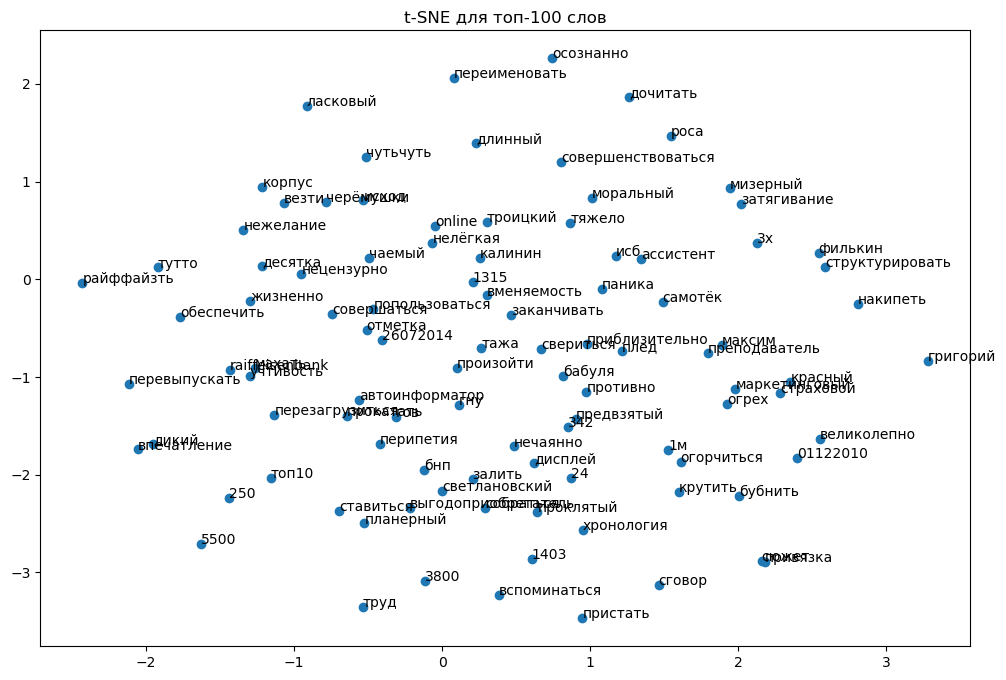

In [ ]:

# Получаем топ-100 слов из модели
top_words = [word for word, _ in model_text.wv.most_similar(positive=['хороший'], topn=100)]

# Получаем векторы для этих слов
vectors = [model_text.wv[word] for word in top_words]
vectors_array = np.array(vectors)

# Применяем t-SNE для снижения размерности
tsne = TSNE(n_components=2, random_state=42, method='exact')
vectors_tsne = tsne.fit_transform(vectors_array)

# Создаем диаграмму рассеяния
plt.figure(figsize=(12, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], marker='o')

# Добавляем подписи для слов
for i, word in enumerate(top_words):
    plt.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

plt.title('t-SNE для топ-100 слов')
plt.show()


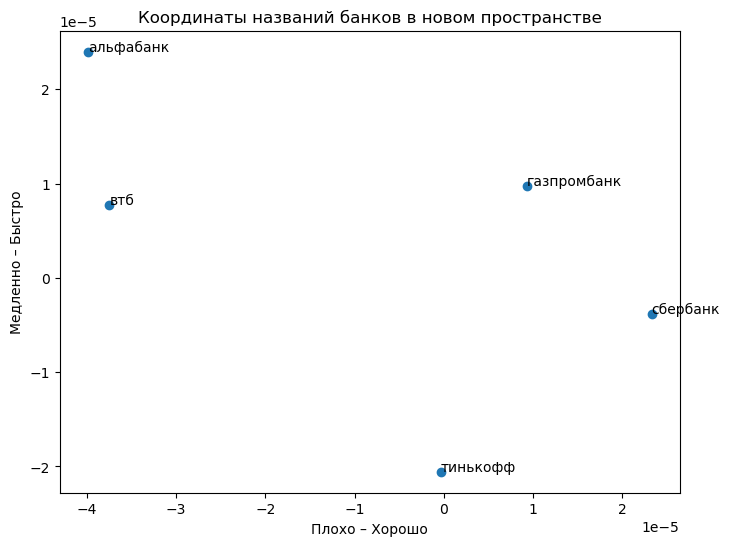

In [ ]:
# Определяем векторы для слов "плохо", "хорошо", "медленно" и "быстро"
vector_bad = model_text.wv['плохо']
vector_good = model_text.wv['хороший']
vector_slow = model_text.wv['медленно']
vector_fast = model_text.wv['быстро']

# Получаем векторы для названий банков
bank_names = ['сбербанк', 'альфабанк', 'втб', 'тинькофф', 'газпромбанк']
bank_vectors = [model_text.wv[bank] for bank in bank_names]

# Вычисляем координаты в новом пространстве
coordinates = []
for bank_vector in bank_vectors:
    coordinate_x = np.dot(bank_vector, vector_good) - np.dot(bank_vector, vector_bad)
    coordinate_y = np.dot(bank_vector, vector_fast) - np.dot(bank_vector, vector_slow)
    coordinates.append((coordinate_x, coordinate_y))

# Визуализируем координаты
plt.figure(figsize=(8, 6))
plt.scatter([coord[0] for coord in coordinates], [coord[1] for coord in coordinates], marker='o')

for i, bank_name in enumerate(bank_names):
    plt.annotate(bank_name, (coordinates[i][0], coordinates[i][1]))

plt.title('Координаты названий банков в новом пространстве')
plt.xlabel('Плохо – Хорошо')
plt.ylabel('Медленно – Быстро')
plt.show()


In [ ]:
pip install igraph

In [ ]:
from sklearn.semi_supervised import LabelPropagation


# список слов
word_list = ["хороший", "удобный", "быстрый", "приятный", "качественный", "плохой", "медленный", "очередь", "отсутствие", "не устраивает"]

# создаем пустой граф
g = ig.Graph(directed=True)

# Добавляем вершины для каждого слова в  списке
for word in word_list:
    g.add_vertex(name=word)

# Определяем схожие слова для каждого слова в списке
similar_words = {
    "хороший": ["удобный", "быстрый", "приятный", "качественный"],
    "плохой": ["медленный", "очередь", "отсутствие", "не устраивает"],
}

# Добавляем ребра между словами на основе схожести
for word, similar in similar_words.items():
    node = g.vs.find(name=word).index
    for sim_word in similar:
        if sim_word in word_list:
            sim_node = g.vs.find(name=sim_word).index
            g.add_edge(node, sim_node)

# Создаем матрицу смежности
adjacency_matrix = np.array(g.get_adjacency().data)

# Определяем метки для позитивных и негативных слов
labels = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

# Создаем объект LabelPropagation и распространяем метки
lp = LabelPropagation(kernel='knn', n_neighbors=4)
lp.fit(adjacency_matrix, labels)

# Получаем новые оценочные слова
new_positive_words = [word_list[i] for i in range(len(labels)) if labels[i] == 1]
new_negative_words = [word_list[i] for i in range(len(labels)) if labels[i] == -1]


#  новые оценочные слова
print("New Positive Words:", new_positive_words)
print("New Negative Words:", new_negative_words)


New Positive Words: ['хороший', 'удобный', 'быстрый', 'приятный', 'качественный']
New Negative Words: ['плохой', 'медленный', 'очередь', 'отсутствие', 'не устраивает']
